In [118]:
import numpy as np
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import random

random.seed(741)

In [85]:
cases = pd.read_csv(r'C:\Users\MartinBirkAndreasen\Desktop\Jazz\QlikWorld\subscription\original_raw\customer_cases.csv', index_col=0)
product = pd.read_csv(r'C:\Users\MartinBirkAndreasen\Desktop\Jazz\QlikWorld\subscription\original_raw\customer_product.csv', index_col=0)
dim_customer = pd.read_csv(r'C:\Users\MartinBirkAndreasen\Desktop\Jazz\QlikWorld\subscription\original_raw\customer_info.csv', index_col=0)

# Generate more users:
- Generate customers in customer_cases
- Add the new customers to dim_customer and generate age, gender, 
- Add customer to products - Add created date. + Generate new cancelation month (after created date)


In [203]:
def add_random_days(date, t_0=60, t_1=120):
    if date.month > 7:
         new_date = date
    
    else:
        n = np.random.uniform(t_0,t_1)
        new_date = date + timedelta(days=n)

    return new_date


In [204]:
sample_size = 200000

gen_cases = pd.DataFrame({
    'case_id' :  np.array(pd.Series(np.repeat("CC", sample_size)) + pd.Series(np.arange(330613, 330613+sample_size)).astype(str)),
    'date_time' : cases['date_time'].sample(sample_size, replace = True, random_state=741).to_numpy(),
    'customer_id' : np.array(pd.Series(np.repeat("C", sample_size)) + pd.Series(np.arange(511380, 511380+sample_size)).astype(str)),
    'channel' : cases['channel'].sample(sample_size, replace = True).to_numpy(),
    'reason' : cases['reason'].sample(sample_size, replace = True).to_numpy(),
    })

gen_cases['date_time'] = pd.to_datetime(gen_cases['date_time']).apply(lambda x: add_random_days(x, t_0=100, t_1=160))

gen_cases

,case_id,date_time,customer_id,channel,reason
0,CC330613,2021-09-30 22:23:24.164414,C511380,phone,support
1,CC330614,2021-09-16 13:18:44.000000,C511381,phone,signup
2,CC330615,2020-09-05 12:13:42.000000,C511382,phone,support
3,CC330616,2020-08-21 18:11:32.444727,C511383,phone,signup
4,CC330617,2020-08-01 19:26:56.698682,C511384,phone,support
...,...,...,...,...,...
199995,CC530608,2020-07-26 18:19:21.130115,C711375,phone,support
199996,CC530609,2019-12-13 14:03:37.948091,C711376,phone,support
199997,CC530610,2021-11-09 20:11:22.485901,C711377,email,support
199998,CC530611,2021-09-15 13:58:44.000000,C711378,phone,signup


In [205]:
gen_cases.groupby(gen_cases['date_time'].dt.month)['customer_id'].count()

date_time
1       248
4      1601
5      8612
6     14227
7     16391
8     36276
9     35304
10    35484
11    30753
12    21104
Name: customer_id, dtype: int64

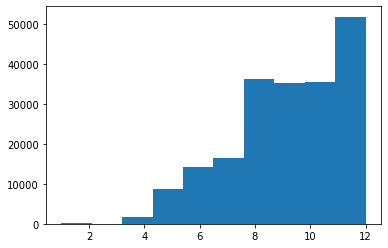

In [206]:
plt.hist(gen_cases['date_time'].dt.month)
plt.show()

In [207]:
gen_cust = pd.DataFrame({
    'customer_id' : np.array(pd.Series(np.repeat("C", sample_size)) + pd.Series(np.arange(511380, 511380+sample_size)).astype(str)),
    'age' : dim_customer['age'].sample(sample_size, replace = True).to_numpy(),
    'gender' : dim_customer['gender'].sample(sample_size, replace = True).to_numpy(),
    })

gen_cust

,customer_id,age,gender
0,C511380,63,male
1,C511381,62,male
2,C511382,44,female
3,C511383,51,male
4,C511384,46,male
...,...,...,...
199995,C711375,66,female
199996,C711376,75,female
199997,C711377,57,female
199998,C711378,52,male


In [260]:
def add_random_cancel_days(date, t_0=30, t_1=800):
    if date.month <= 2:
         new_date = date + timedelta(days=365)
    
    elif (date.year == 2020) & (date.month > 3) & (date.month < 8):    
        new_date = date + timedelta(days=10)

    elif (date.month > 2) & (date.month < 9):    
        new_date = date + timedelta(days=160)

    else:
        n = np.random.uniform(t_0,t_1)
        new_date = date + timedelta(days=n)

    return new_date

In [261]:
gen_prod = gen_cases[['customer_id', 'date_time']].copy()

gen_prod['product'] = product['product'].sample(sample_size, replace = True).to_numpy()

gen_prod = gen_prod[['customer_id', 'product', 'date_time']].copy()

gen_prod['date_time'] = pd.to_datetime(gen_prod['date_time']) 

gen_prod['cancel_date_time'] = gen_prod['date_time'].apply(lambda x: add_random_cancel_days(x))

gen_prod = gen_prod.rename(columns={'date_time': 'signup_date_time'})

gen_prod

,customer_id,product,signup_date_time,cancel_date_time
0,C511380,prd_1,2021-09-30 22:23:24.164414,2022-08-31 22:59:14.513258
1,C511381,prd_1,2021-09-16 13:18:44.000000,2023-05-19 23:48:20.524106
2,C511382,prd_1,2020-09-05 12:13:42.000000,2020-10-07 11:30:27.811391
3,C511383,prd_1,2020-08-21 18:11:32.444727,2021-01-28 18:11:32.444727
4,C511384,prd_2,2020-08-01 19:26:56.698682,2021-01-08 19:26:56.698682
...,...,...,...,...
199995,C711375,prd_1,2020-07-26 18:19:21.130115,2020-08-05 18:19:21.130115
199996,C711376,prd_1,2019-12-13 14:03:37.948091,2021-09-21 21:41:53.690463
199997,C711377,prd_1,2021-11-09 20:11:22.485901,2023-11-04 21:22:31.488254
199998,C711378,prd_1,2021-09-15 13:58:44.000000,2023-03-01 12:08:21.188780


In [262]:
gen_prod.groupby(gen_prod['cancel_date_time'].dt.month)['customer_id'].count()

cancel_date_time
1     42553
2     17867
3      9942
4      9838
5     11773
6     12982
7     14109
8     11187
9      9990
10    15559
11    20958
12    23242
Name: customer_id, dtype: int64

# Merge original and generated data

In [263]:
new_cases = pd.concat([cases,gen_cases], ignore_index=True)
new_product = pd.concat([product,gen_prod], ignore_index=True)
new_dim_customer = pd.concat([dim_customer, gen_cust], ignore_index=True)

[]

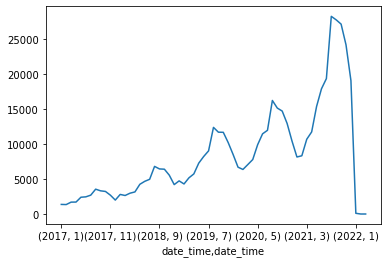

In [264]:
group = new_cases.groupby([pd.DatetimeIndex(new_cases['date_time']).year, pd.DatetimeIndex(new_cases['date_time']).month])['customer_id'].count()
group.plot(x = 'customer_id')
plt.plot()

[]

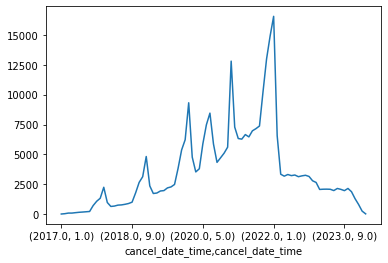

In [266]:

group2 = new_product.groupby([pd.DatetimeIndex(new_product['cancel_date_time']).year, pd.DatetimeIndex(new_product['cancel_date_time']).month])['customer_id'].count()
group2.plot(x = 'customer_id')
plt.plot()

# Save new data

In [268]:
new_cases.to_csv(r'C:\Users\MartinBirkAndreasen\Desktop\Jazz\QlikWorld\subscription\raw\customer_cases.csv', index=False, encoding='utf-8', sep=',')
new_product.to_csv(r'C:\Users\MartinBirkAndreasen\Desktop\Jazz\QlikWorld\subscription\raw\customer_product.csv', index=False, encoding='utf-8', sep=',')
new_dim_customer.to_csv(r'C:\Users\MartinBirkAndreasen\Desktop\Jazz\QlikWorld\subscription\raw\customer_info.csv', index=False, encoding='utf-8', sep=',')